### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
sns.set_palette('pastel')

In [2]:
df = pd.read_csv("Netflix Dataset.csv") 
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [4]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [5]:
df.describe(include='all')

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [6]:
df.drop_duplicates(inplace=True)

### Data Cleaning

In [7]:
df['Director'].fillna('Not Available', inplace=True)
df['Cast'].fillna('Not Available', inplace=True)
df['Country'].fillna('Not Available', inplace=True)

In [8]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Release_Year'] = df['Release_Date'].dt.year

### Movies vs TV Shows

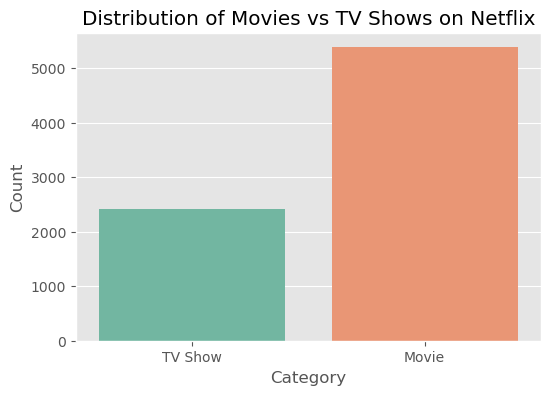

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='Category', data=df, palette='Set2')
plt.title("Distribution of Movies vs TV Shows on Netflix")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

### Content Added Over the Years

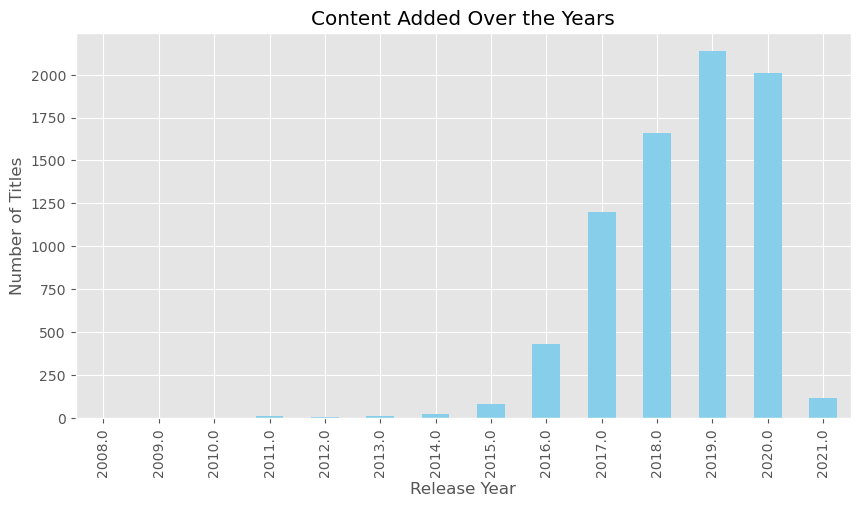

In [10]:
plt.figure(figsize=(10,5))
df['Release_Year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Content Added Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

### Top 10 Countries Contributing to Netflix

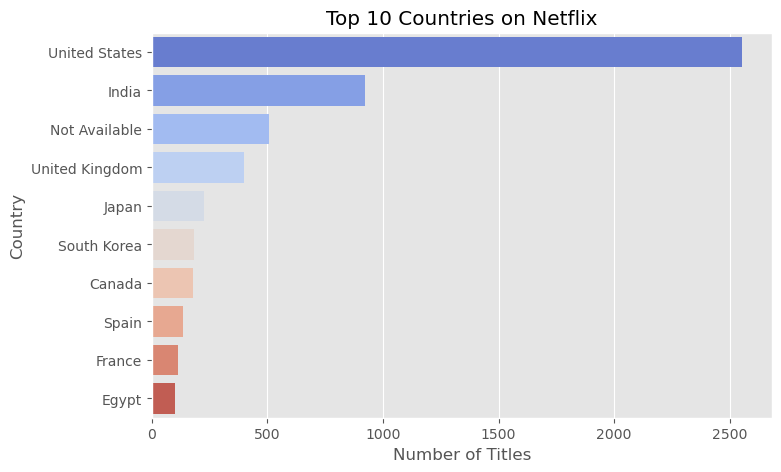

In [11]:
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

### Most Common Ratings

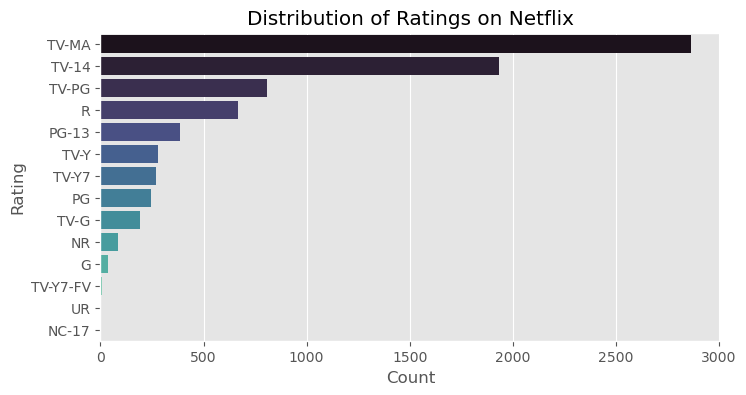

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(y='Rating', data=df, order=df['Rating'].value_counts().index, palette='mako')
plt.title("Distribution of Ratings on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

### Duration Analysis (Movies Only)

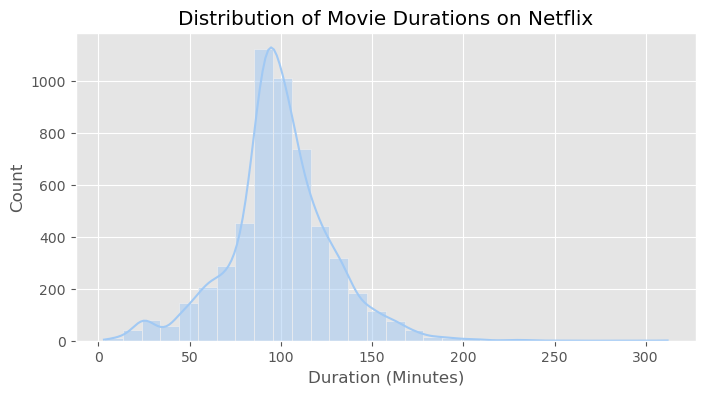

In [13]:
# Extract numerical duration
movie_data = df[df['Category'] == 'Movie']
movie_data['Minutes'] = movie_data['Duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(8,4))
sns.histplot(movie_data['Minutes'].dropna(), bins=30, kde=True)
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count")
plt.show()


### Most Frequent Directors

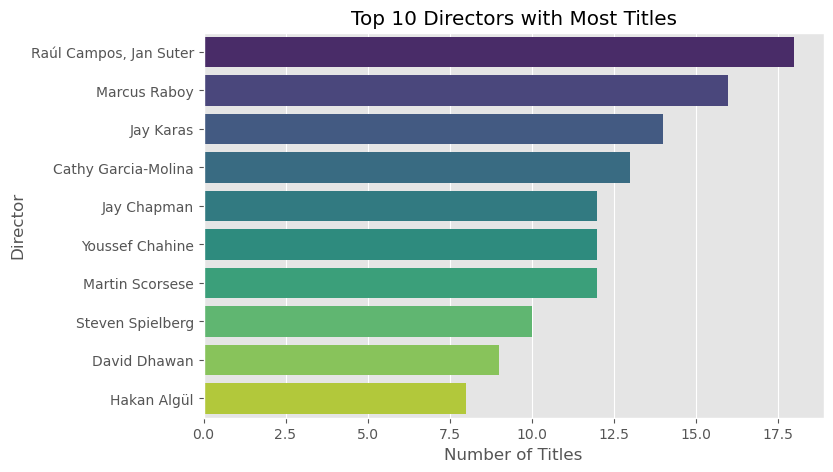

In [14]:
top_directors = df[df['Director'] != 'Not Available']['Director'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title("Top 10 Directors with Most Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

### Word Cloud of Descriptions

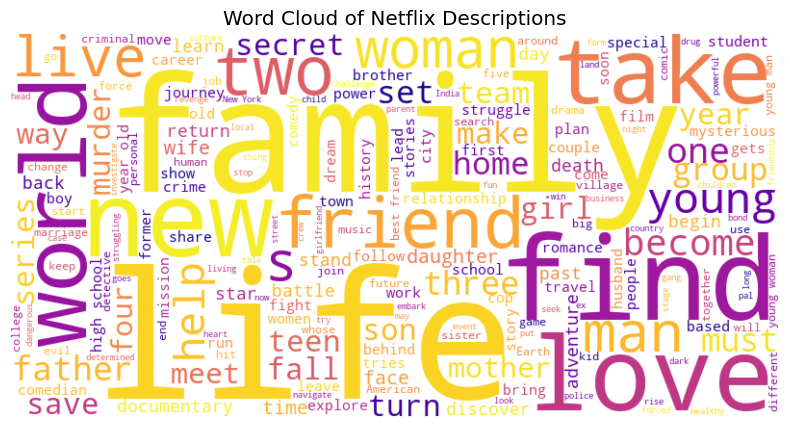

In [15]:
from wordcloud import WordCloud

text = " ".join(desc for desc in df['Description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Netflix Descriptions")
plt.show()

### Insights Summary

In [16]:
print("✅ Insights:")
print("- Netflix has more Movies than TV Shows overall.")
print("- Significant content growth observed between 2015–2020.")
print("- USA, India, and UK dominate the content library.")
print("- TV-MA and TV-14 are the most common ratings.")
print("- Average movie duration is around 90 minutes.")

✅ Insights:
- Netflix has more Movies than TV Shows overall.
- Significant content growth observed between 2015–2020.
- USA, India, and UK dominate the content library.
- TV-MA and TV-14 are the most common ratings.
- Average movie duration is around 90 minutes.
